<a href="https://colab.research.google.com/github/ayushjain1144/Active-Learning/blob/master/Diversity_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install modAL

In [0]:
import numpy as np
from sklearn import datasets
from sklearn import decomposition

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from modAL.uncertainty import uncertainty_sampling
from modAL.uncertainty import classifier_uncertainty
from modAL.models import ActiveLearner


In [0]:
rnd_seed = 452
np.random.seed(rnd_seed)

In [0]:
irs = datasets.load_iris()
x_pre = irs['data']
y_pre = irs['target']

In [0]:
pca = decomposition.PCA(n_components=2, random_state=rnd_seed)
irs_trns = pca.fit_transform(X=x_pre)

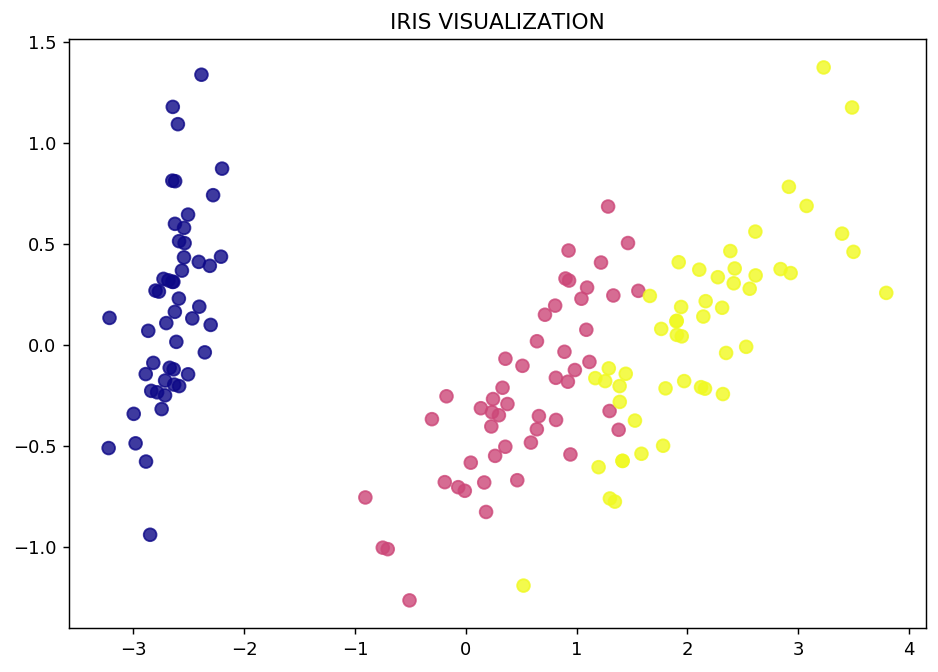

In [6]:
x_c, y_c = irs_trns[:,0], irs_trns[:,1]

plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x=x_c, y=y_c, c=y_pre, cmap='plasma', s=50, alpha=8/10)
plt.title('IRIS VISUALIZATION')
plt.show()

## Diversity Sampling: The cluster method

In [0]:
dataset_size = x_pre.shape

In [0]:
idx_training = np.random.randint(low=0,high=dataset_size[0], size=3)
x_train = x_pre[idx_training]
y_train = y_pre[idx_training]

x_pool = np.delete(x_pre, idx_training, axis=0)

y_pool = np.delete(y_pre, idx_training, axis=0)

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)

learner = ActiveLearner(estimator=knn, query_strategy=uncertainty_sampling, X_training=x_train, y_training=y_train)
initial_score = learner.score(x_pool, y_pool)

print(f"Prediction Accuracy using only 3 samples - KNN: {initial_score}")

Prediction Accuracy using only 3 samples - KNN: 0.32653061224489793


In [22]:
# Evaluating the model's performance on the initial dataset

pred_initial = learner.predict(x_pre)
is_correct_pred = (pred_initial == y_pre)

pred_initial

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

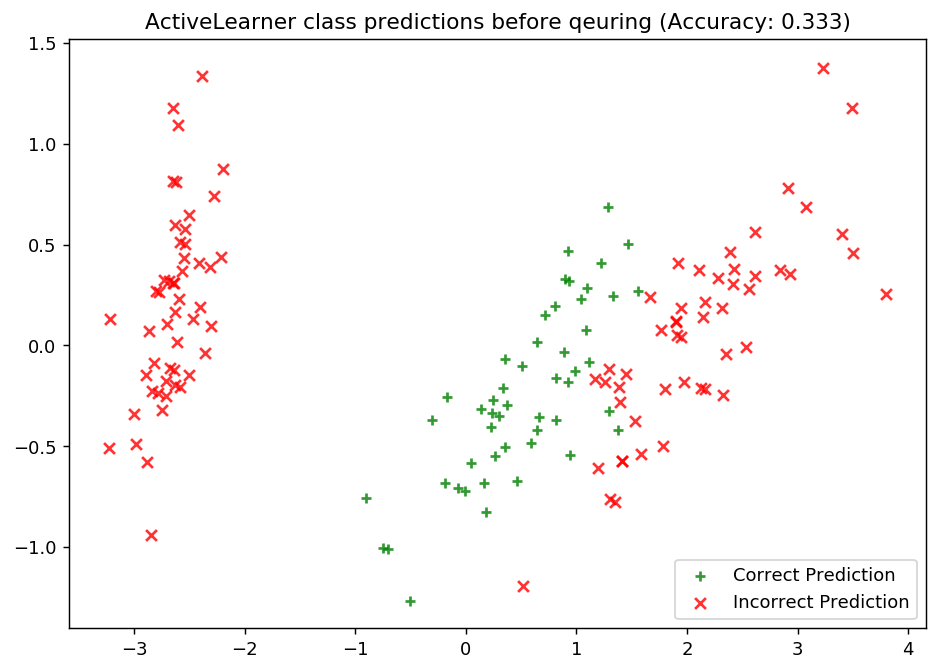

In [23]:

score_before_querying = learner.score(x_pre, y_pre)

# Plot the results

fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(x=x_c[is_correct_pred],  y=y_c[is_correct_pred],  c='g', marker='+', label='Correct Prediction',   alpha=8/10)
ax.scatter(x=x_c[~is_correct_pred], y=y_c[~is_correct_pred], c='r', marker='x', label='Incorrect Prediction', alpha=8/10)
ax.legend(loc='lower right')
ax.set_title("ActiveLearner class predictions before qeuring (Accuracy: {score:.3f})".format(score=score_before_querying))
plt.show()

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=10)
km = kmeans.fit(x_pre)

In [42]:
print(kmeans.cluster_centers_[0])

[6.56818182 3.08636364 5.53636364 2.16363636]


In [43]:
np.where((x_pre == kmeans.cluster_centers_[0]).all(axis=1))

(array([], dtype=int64),)

In [44]:
kmeans.labels_

array([9, 7, 7, 7, 9, 1, 7, 9, 7, 7, 1, 9, 7, 7, 1, 1, 1, 9, 1, 1, 9, 9,
       7, 9, 9, 7, 9, 9, 9, 7, 7, 9, 1, 1, 7, 9, 1, 9, 7, 9, 9, 7, 7, 9,
       1, 7, 1, 7, 1, 9, 8, 8, 8, 2, 8, 2, 8, 5, 8, 2, 5, 2, 2, 8, 2, 8,
       2, 2, 4, 2, 4, 2, 4, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 4, 2, 8, 8, 8,
       2, 2, 2, 8, 2, 5, 2, 2, 2, 8, 5, 2, 0, 4, 6, 0, 0, 3, 2, 6, 0, 6,
       0, 4, 0, 4, 4, 0, 0, 3, 3, 4, 0, 4, 3, 4, 0, 6, 4, 4, 0, 6, 6, 3,
       0, 4, 4, 3, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4], dtype=int32)

In [0]:
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

In [46]:
mydict

{0: array([100, 103, 104, 108, 110, 112, 115, 116, 120, 124, 128, 132, 136,
        137, 139, 140, 141, 143, 144, 145, 147, 148]),
 1: array([ 5, 10, 14, 15, 16, 18, 19, 32, 33, 36, 44, 46, 48]),
 2: array([ 53,  55,  59,  61,  62,  64,  66,  67,  69,  71,  79,  80,  81,
         82,  84,  88,  89,  90,  92,  94,  95,  96,  99, 106]),
 3: array([105, 117, 118, 122, 131, 135]),
 4: array([ 68,  70,  72,  83, 101, 111, 113, 114, 119, 121, 123, 126, 127,
        133, 134, 138, 142, 146, 149]),
 5: array([57, 60, 93, 98]),
 6: array([102, 107, 109, 125, 129, 130]),
 7: array([ 1,  2,  3,  6,  8,  9, 12, 13, 22, 25, 29, 30, 34, 38, 41, 42, 45,
        47]),
 8: array([50, 51, 52, 54, 56, 58, 63, 65, 73, 74, 75, 76, 77, 78, 85, 86, 87,
        91, 97]),
 9: array([ 0,  4,  7, 11, 17, 20, 21, 23, 24, 26, 27, 28, 31, 35, 37, 39, 40,
        43, 49])}

Add the centroids to the dataset

In [0]:
learner_full = ActiveLearner(estimator=knn, X_training=x_pre, y_training=y_pre)
y_labels = learner_full.predict(kmeans.cluster_centers_)

In [48]:
y_labels

array([2, 0, 1, 2, 2, 1, 2, 0, 1, 0])

In [40]:
num_of_queries = 3


past_performances = [score_before_querying]

# Allow our model to query the unlabeled dataset for the most informative
# points according to the querying strategy (diversity sampling).


for i in range(num_of_queries):

  learner.teach(X=kmeans.cluster_centers_[i].reshape(1, -1),y=y_labels[i].reshape(1,))

  accuracy = learner.score(x_pre,y_pre)

  print('Accuracy after query {n}: {acc:0.4f}'.format(n=i + 1, acc=accuracy))

  past_performances.append(accuracy)


Accuracy after query 1: 0.3333
Accuracy after query 2: 0.6667
Accuracy after query 3: 0.6667
